In [2]:
import math
import json
import pandas as pd
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

In [3]:
def circles(x, y, s, c='b', vmin=None, vmax=None, **kwargs):
    """
    https://stackoverflow.com/questions/9081553/python-scatter-plot-size-and-style-of-the-marker/24567352#24567352
    """
    if np.isscalar(c):
        kwargs.setdefault('color', c)
        c = None
    if 'fc' in kwargs: kwargs.setdefault('facecolor', kwargs.pop('fc'))
    if 'ec' in kwargs: kwargs.setdefault('edgecolor', kwargs.pop('ec'))
    if 'ls' in kwargs: kwargs.setdefault('linestyle', kwargs.pop('ls'))
    if 'lw' in kwargs: kwargs.setdefault('linewidth', kwargs.pop('lw'))

    patches = [Circle((x_, y_), s_) for x_, y_, s_ in np.broadcast(x, y, s)]
    collection = PatchCollection(patches, **kwargs)
    if c is not None:
        collection.set_array(np.asarray(c))
        collection.set_clim(vmin, vmax)

    ax = plt.gca()
    ax.add_collection(collection)
    ax.autoscale_view()
    if c is not None:
        plt.sci(collection)
    return collection

def calcSlope(x1,y1,x2,y2):
    if x1 == x2 and y1 == y2:
        return "NaL"
    elif x1 == x2:
        return "vertical"
    elif y1 == y2:
        return "horizontal"
    else:
        return round((y2-y1)/(x2-x1),4)

def calcDistance(x1,y1,x2,y2): 
    """
    determine the distance between 2 points on a coordinate plane
    """
    return round(math.sqrt((x2 - x1)**2 + (y2 - y1)**2),4)

def calcCost(distance):
    """
    determine the cost of the movement according to the rules:
    Each swing costs the particle $D^-2, where D is the straight-line distance of the length of rope used for that particular swing.
    """
    return round(pow(distance, -2),4)

def plotPathToss(x1,y1,x2,y2):
    # plot points
    ax.plot(x1, y1, 'bo')
    ax.plot(x2, y2, 'bo')
    # plot line
    ax.plot([x1, x2],[y1, y2],'b-')
    d = calcDistance(x1, y1, x2, y2)
    # print("Distance: {0:.4f}".format(d))
    # print("Cost: {0:.4f}".format(calcCost(d)))
    # print("Sum of Squares: {0:.4f}".format(sumOfSquares(d)))
    # circles(x2, y2, d, alpha=0.2, lw=5, edgecolor='b')
    return d

def plotPathSwing(x1,y1,x2,y2,remaining):
    # plot points
    ax.plot(x1, y1, 'ro')
    ax.plot(x2, y2, 'ro')
    # plot line
    ax.plot([x1, x2],[y1, y2],'r-')
    d = calcDistance(x1, y1, x2, y2)
    d = remaining-d
    print(d)
    if d > 0:
        circles(x2, y2, d, alpha=0.2, lw=5, edgecolor='b')
    return d

def sumOfSquares(n):
    return sum([i**2 for i in range(1, math.floor(n) + 1)])

5.0
2.0
9.0677
1.9966


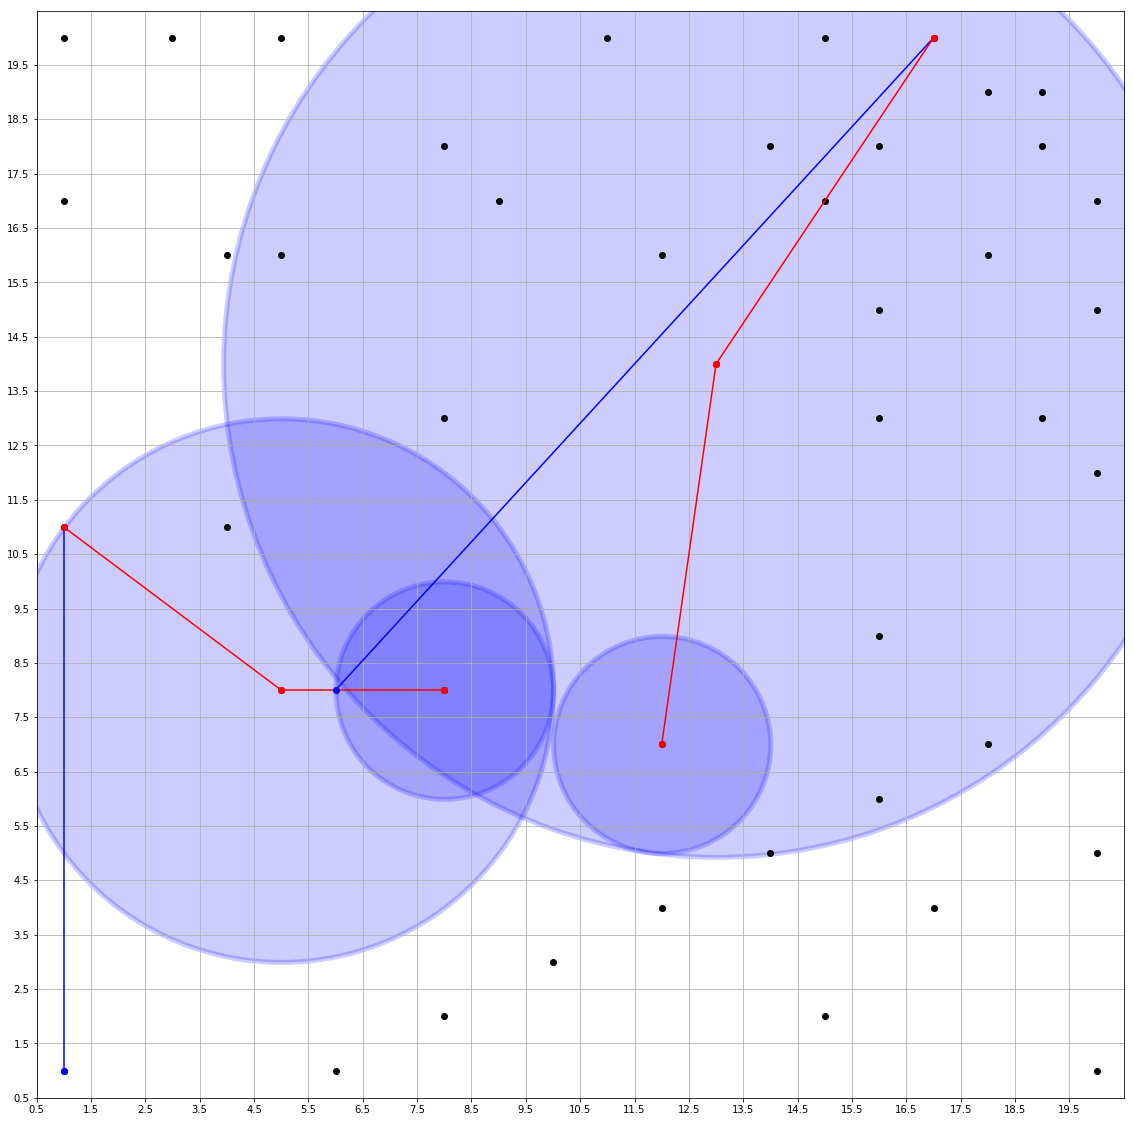

In [25]:
coords = [(1.0, 1.0), (3.0, 20.0), (5.0, 20.0), (11.0, 20.0), (15.0, 20.0), (17.0, 20.0), (18.0, 19.0), (19.0, 19.0), (8.0, 18.0), (14.0, 18.0), (16.0, 18.0), (19.0, 18.0), (1.0, 17.0), (9.0, 17.0), (15.0, 17.0), (20.0, 17.0), (4.0, 16.0), (5.0, 16.0), (12.0, 16.0), (18.0, 16.0), (16.0, 15.0), (20.0, 15.0), (13.0, 14.0), (8.0, 13.0), (16.0, 13.0), (19.0, 13.0), (20.0, 12.0), (1.0, 11.0), (4.0, 11.0), (16.0, 9.0), (5.0, 8.0), (8.0, 8.0), (12.0, 7.0), (18.0, 7.0), (16.0, 6.0), (14.0, 5.0), (20.0, 5.0), (12.0, 4.0), (17.0, 4.0), (10.0, 3.0), (8.0, 2.0), (15.0, 2.0), (1.0, 20.0), (6.0, 1.0), (20.0, 1.0)]

figure(figsize=(20,20))
ax=subplot(aspect='equal')
xlim(.5,20.5)
ylim(.5,20.5)
ax.set_xticks(np.arange(.5, 20.5, 1))
ax.set_yticks(np.arange(.5, 20.5, 1))
# plot all coordinates
[ax.plot(i[0], i[1], 'ko') for i in coords]
    
# move 1
r = plotPathToss(1,1, 1,11)
r = plotPathSwing(1,11, 5,8,r)
r = plotPathSwing(5,8, 8,8,r)
# plotPathSwing(4.5,7.5, 9.5,7.5,r)


# # # move 2
r = plotPathToss(6,8, 17,20)
r = plotPathSwing(17,20, 13,14, r)
r = plotPathSwing(13,14, 12,7, r)

# # # # move 3
# r = plotPathToss(14,8, 1,17)
# r = plotPathSwing(1,17, 8,13, r)
# r = plotPathSwing(8,13, 16,12, r)

# # # # move 4
# r = plotPathToss(16,12, 20,15)
# r = plotPathSwing(20,15, 18,17, r)

# # # move 5
# r = plotPathToss(10,1, 11,20)
# r = plotPathSwing(11,20, 12,1, r)

# # # move 6
# r = plotPathToss(12,1, 13,14)
# r = plotPathSwing(13,14, 14,1, r)

# # # move 7
# r = plotPathToss(14,1, 18,7)
# r = plotPathSwing(18,7, 12,3, r)

# # # move 8
# r = plotPathToss(12,3, 16,6)
# r = plotPathSwing(16,6, 13,2, r)

# # # move 9
# r = plotPathToss(13,2, 8,18)
# # r = plotPathSwing(16,6, 13,2, r)
# # r = plotPathToss(5.0, 20.0, 12, 10)


plt.grid()


In [13]:
print(calcDistance(6,8, 17,20))
print(calcDistance(17,20, 13,14))
print(calcDistance(13,14, 12,7))
print(16.2788-(7.2111+7.0711))

16.2788
7.2111
7.0711
1.9966000000000008


In [14]:
print(calcDistance(12,7,14,8))
print(calcDistance(.5,.5,1.5,1.5))
print(calcDistance(.5,.5,.5,1.5))
print(calcDistance(.5,.5,1.5,1.5))

2.2361
1.4142
1.0
1.4142
